# Lecture 02 Part 01 Test NB
In this notebook we will uncover methods of supervised learning.

- Supervised Learning:
    - Linear Regression

### Supervised Learning (Linear Regression)

- You are given a dataset "Linear Regression - Sheet 1.csv" in the datasets folder.

*Dataset:*
- The dataset contains two columns: x & y
- The x values are just iterating values
- The y values depend on the equation y = mx + c

**Task 01:**
- Visualize the data set and see if Simple Linear Regression can be applied to it.

**Task 02:**
- Create a Simple Linear Regression based model which can predict the values of y given the values of x.

Relavant Imports

Lets generate a dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

plot_style = {
    "grid.linestyle" : "--",
    "grid.color" : "darkblue"
}
sns.set_theme(context= 'notebook', style= 'whitegrid', color_codes= True, rc= plot_style)

In [2]:
# Set the `datasets` folder as the default to find any data
dataset_dir = "datasets/"

lin_reg_data = dataset_dir + "linear_regression_sheet_1.csv"
clustering_data = dataset_dir + "marketing_campaign_clustering.csv"

Load the dataset into a `pandas.DataFrame()`

In [3]:
df = pd.read_csv(lin_reg_data)
df.head()

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556


### Solution - Task 01

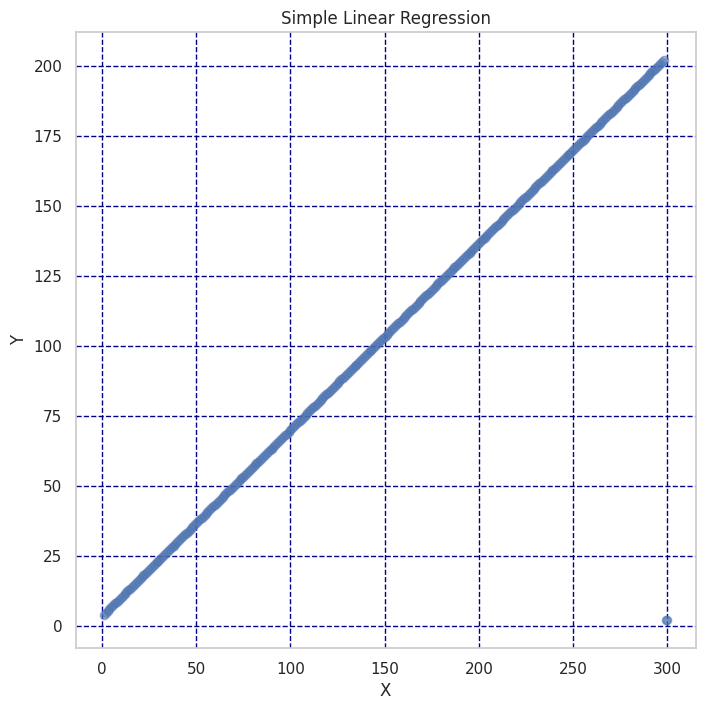

In [4]:
plt.figure(figsize= (8, 8))
plt.scatter(x= df['X'], y= df['Y'], alpha= 0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.show()

In [5]:
df2 = pd.read_csv(clustering_data)
df2.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
df2_mod = df2[['Year_Birth', 'Income']]
df2_mod.head()

,Year_Birth,Income
0,1957,58138.0
1,1954,46344.0
2,1965,71613.0
3,1984,26646.0
4,1981,58293.0


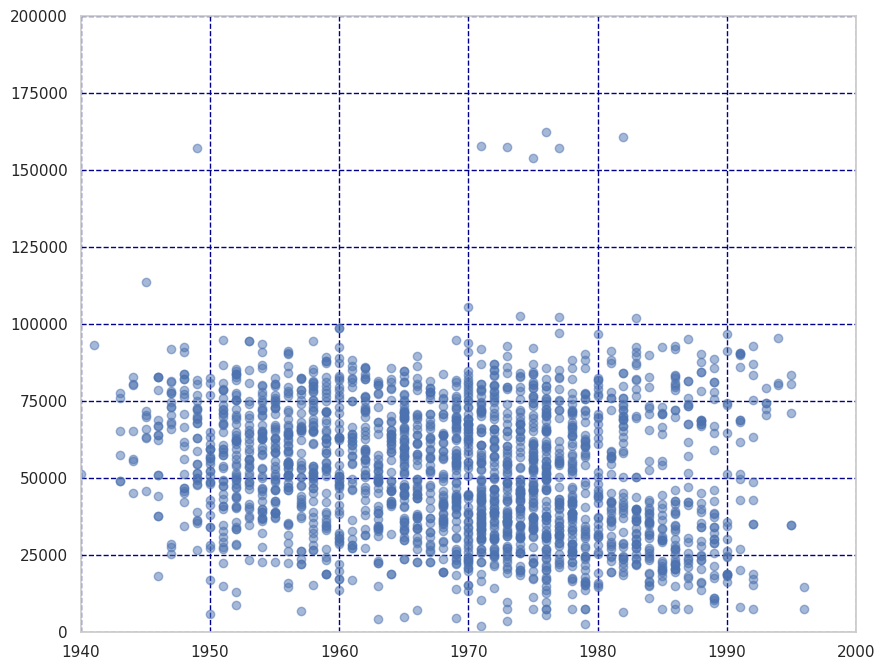

In [7]:
plt.figure(figsize= (10, 8))
plt.scatter(x= df2_mod['Year_Birth'], y= df2_mod['Income'], alpha= 0.5)
plt.xlim(1940, 2000)
plt.ylim(0, 2e5)
plt.show()

Create Clusters using the KMeans package from SciKit Learn

In [8]:
df2_mod.ffill(inplace= True)
df2_mod.head()

/tmp/ipykernel_89616/2426868556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_mod.ffill(inplace= True)


,Year_Birth,Income
0,1957,58138.0
1,1954,46344.0
2,1965,71613.0
3,1984,26646.0
4,1981,58293.0


In [9]:
x = df2_mod.copy()

wcss = list()

cl_num = 10
for i in range(1, cl_num):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
print(wcss)

[1414009609089.5225, 678940462827.5658, 530459958477.96375, 184503014331.79346, 123564668598.37181, 81986077836.87666, 54197843350.66381, 40448231907.72997, 31565396983.18761]


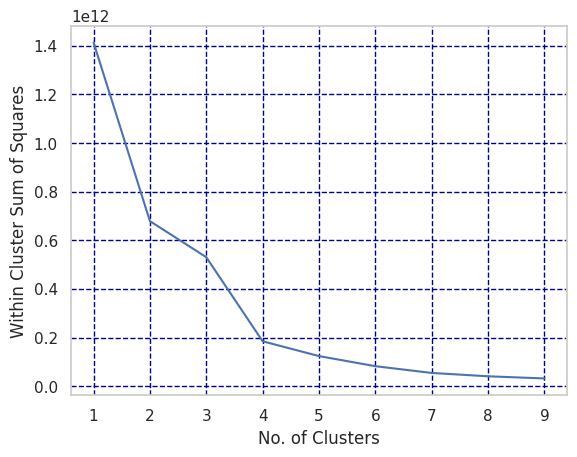

In [10]:
num_clusters = range(1, cl_num)
plt.plot(num_clusters, wcss)
plt.xlabel("No. of Clusters")
plt.ylabel("Within Cluster Sum of Squares")
plt.show()

In [11]:
kmeans = KMeans(4)
kmeans.fit(x)
x['cluster_no'] = kmeans.fit_predict(x)
x.head()

,Year_Birth,Income,cluster_no
0,1957,58138.0,0
1,1954,46344.0,0
2,1965,71613.0,3
3,1984,26646.0,1
4,1981,58293.0,0


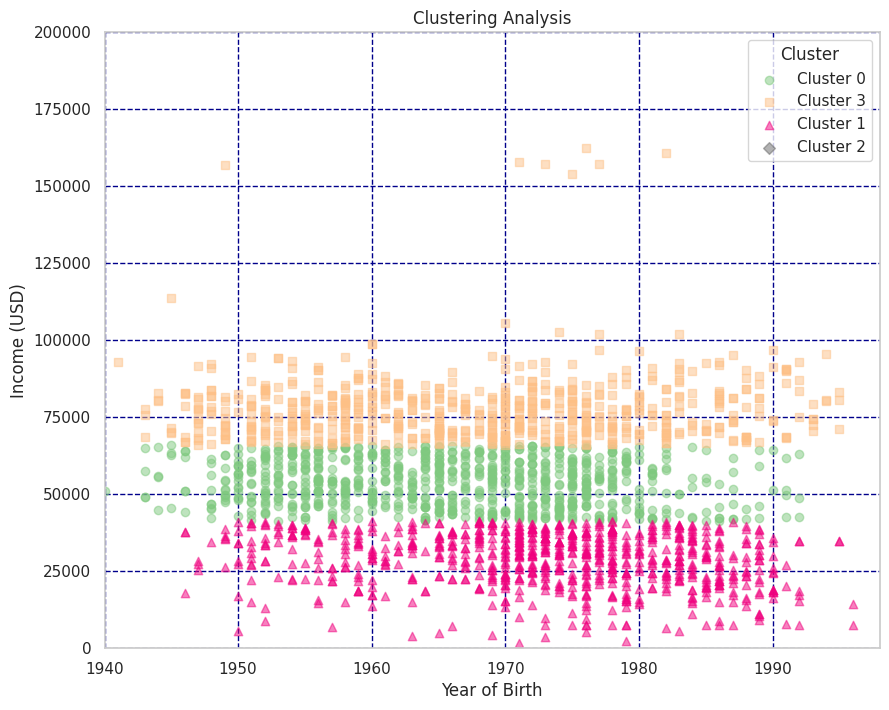

In [12]:
import matplotlib.pyplot as plt

# Define unique clusters and their markers/colors
clusters = x['cluster_no'].unique()
markers = ['o', 's', '^', 'D']  # Circle, Square, Triangle, Diamond
colors = plt.get_cmap('Accent', len(clusters))  # Use a colormap for colors

plt.figure(figsize=(10, 8))

# Plot each cluster with a different marker and color
for cluster, marker, color in zip(clusters, markers, colors.colors):
    cluster_data = x[x['cluster_no'] == cluster]
    plt.scatter(
        x=cluster_data['Year_Birth'],
        y=cluster_data['Income'],
        alpha=0.5,
        c=[color],
        marker=marker,
        label=f'Cluster {cluster}'
    )

# Set axis limits
plt.xlim(1940, 1998)
plt.ylim(0, 2e5)

# Add labels and title
plt.xlabel("Year of Birth")
plt.ylabel("Income (USD)")
plt.title("Clustering Analysis")

# Add legend
plt.legend(title='Cluster')

# Show the plot
plt.show()
